# Задание 1, 2 

In [39]:
import pandas as pd

In [40]:
BAR = pd.read_csv('brent_prices.csv', sep=';')
RUB = pd.read_csv('dollar_curs.csv', sep=';')
INR = pd.read_csv('indian_curs.csv', sep=';')

#### Вывод данных из ДатаФреймов

In [41]:
BAR.head()

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ICE.BRN,M,20180901,77.69,83.41,75.64,82.98,3141389
1,ICE.BRN,M,20181001,82.97,86.74,74.58,74.59,4406167
2,ICE.BRN,M,20181101,74.69,74.99,57.78,59.07,4333185
3,ICE.BRN,M,20181201,59.98,63.73,50.22,54.15,3459773
4,ICE.BRN,M,20190101,54.12,63.15,52.51,61.22,3659813


In [42]:
RUB.head()

,curs,nominal,date
0,65.854527,1.0,2018-10-01
1,66.355681,1.0,2018-11-01
2,67.335314,1.0,2018-12-01
3,66.512544,1.0,2019-01-01
4,65.810525,1.0,2019-02-01


In [43]:
INR.head()

,curs,nominal,date
0,89.510109,100.0,2018-10-01
1,92.270848,100.0,2018-11-01
2,95.322173,100.0,2018-12-01
3,93.633431,100.0,2019-01-01
4,92.382145,100.0,2019-02-01


#### На данный момент имеем: 
BAR к доллару, Доллар к RUB, 100 Индийских рупий к Рублю. 
Приведём все данные к одной величине

#### 1 рубль - n долларов

In [44]:
RUB['curs'] = 1 / RUB['curs'] 

In [45]:
RUB.head()

,curs,nominal,date
0,0.015185,1.0,2018-10-01
1,0.015070,1.0,2018-11-01
2,0.014851,1.0,2018-12-01
3,0.015035,1.0,2019-01-01
4,0.015195,1.0,2019-02-01


#### 1 рупия - k долларов 
Массивы одинакового размера, поэтому так делать можно

In [51]:
INR['curs'] = INR['curs'] * RUB['curs'] / 100

In [54]:
INR.head()

,curs,nominal,date
0,0.000206,100.0,2018-10-01
1,0.000210,100.0,2018-11-01
2,0.000210,100.0,2018-12-01
3,0.000212,100.0,2019-01-01
4,0.000213,100.0,2019-02-01


#### Соберёмся всё в 1 ДатаФрейм

In [125]:
df = pd.DataFrame({'BAR': BAR['<CLOSE>'], 'RUB': RUB['curs'], 'INR': INR['curs']})

In [126]:
df.head()

,BAR,RUB,INR
0,82.98,0.015185,0.000206
1,74.59,0.015070,0.000210
2,59.07,0.014851,0.000210
3,54.15,0.015035,0.000212
4,61.22,0.015195,0.000213


# Задание 3 

In [127]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Построение графиков P-P и Q-Q для переменных BAR, RUB, INR

#### BAR

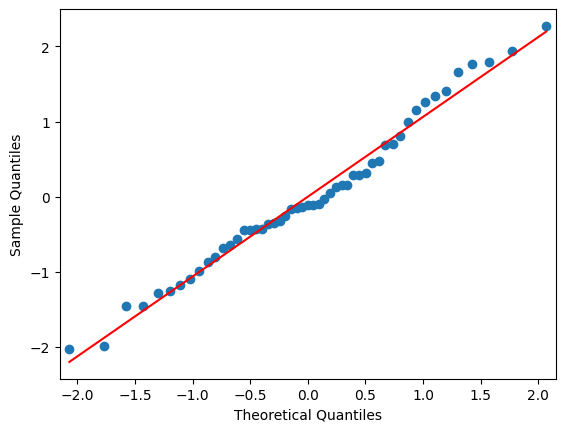

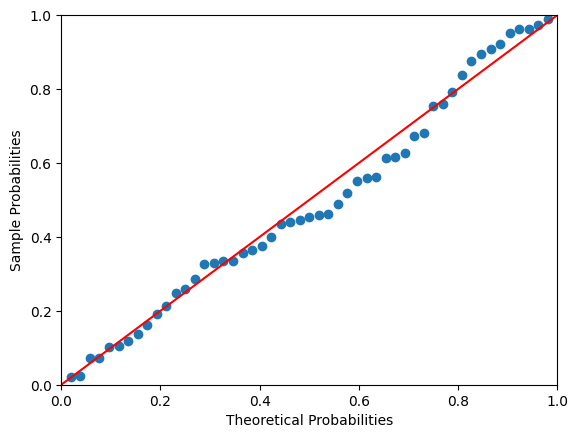

In [144]:
probplot = sm.ProbPlot(df['BAR'])
probplot.qqplot(line = 'r')
probplot.ppplot(line = '45')

plt.show()

#### INR

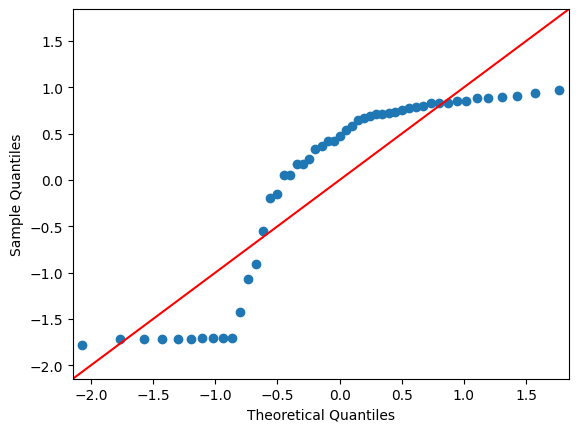

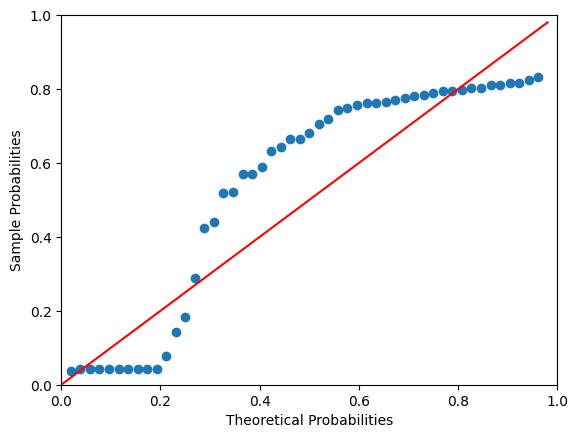

In [145]:
probplot = sm.ProbPlot(df['INR'])
probplot.qqplot(line = '45')
probplot.ppplot(line = '45')

plt.show()

#### RUB

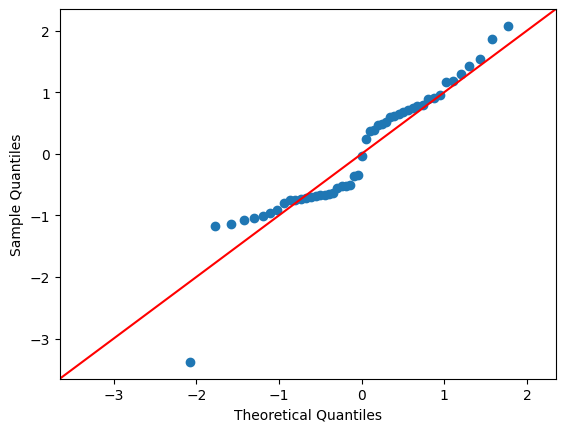

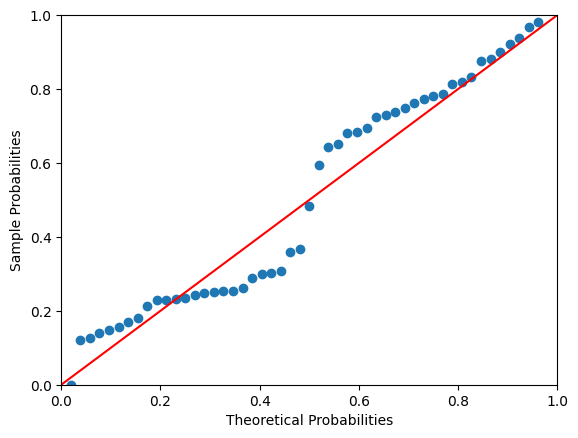

In [146]:
probplot = sm.ProbPlot(df['RUB'])
probplot.qqplot(line = '45')
probplot.ppplot(line = '45')

plt.show()

### Вывод - требуется стандартизация данных

In [141]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
scaler_range = preprocessing.MinMaxScaler()

#### Способ 1

In [142]:
for i in df.columns:
    df[i] = scaler_std.fit_transform(df[[i]])

#### Способ 2

In [133]:
for i in df.columns:
    df[i] = scaler_range.fit_transform(df[[i]])

In [143]:
df.head()

,BAR,RUB,INR
0,0.689864,0.469035,0.671435
1,0.290845,0.389128,0.711523
2,-0.447267,0.236362,0.720095
3,-0.681256,0.364364,0.738037
4,-0.345016,0.476109,0.758947


# Задание 4

# Задание 5

# Задание 6

# Задание 7

# Задание 8

# Задание 9